# Spettrometro


## TO DO:
1) capire bene quali lambda usare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import chi2
from iminuit import Minuit
from iminuit.cost import LeastSquares
from uncertainties import ufloat
import uncertainties.umath as uu

In [2]:
f_mul = 4 #fattore di correzione (non possiamo usare la sensibilita di 1' per l'angolo di minima deviazione)

### Angolo al vertice

In [3]:
theta_i = np.radians(np.array([52 + 40/60, 54 + 41/60, 56 + 30/60]))
theta_f = np.radians(np.array([172 + 29/60, 174 + 35/60, 176 + 15/60]))
alpha_val_array = theta_f - theta_i
alpha_val = np.mean(alpha_val_array) / 2
alpha_err = ( np.sqrt(2) * np.radians(1/60) ) / np.sqrt(3) #errore della media
alpha = ufloat(alpha_val, alpha_err)

### Legge di Cauchy (mercurio)

In [4]:
theta_i_hg = ufloat(np.radians(30),np.radians(1/60 * f_mul))
theta_f_hg_senzaerr = np.radians(np.array([77 + 34/60, 77 + 50/60, 78 + 2/60, 78 + 10/60])) #mercurio
theta_f_hg = []

for i in range(len(theta_f_hg_senzaerr)):
    theta_f_hg.append(ufloat(theta_f_hg_senzaerr[i],np.radians(1/60 * f_mul)))

theta_f_hg = np.array(theta_f_hg)

delta_hg = theta_f_hg - theta_i_hg

lambda_hg = np.array([579, 546.1, 502.5, 435.8]) * 10 ** (-9) #da confermare

In [5]:
n = []
n_val = []
n_err = []

for i in range(len(delta_hg)):
    n.append( uu.sin((delta_hg[i] + alpha)/2) / uu.sin(alpha/2) )
    n_val.append(n[i].nominal_value)
    n_err.append(n[i].std_dev)

In [6]:
def model(x,a,b): #legge di Cauchy
    return a + b/(x**2)

minimi_quadrati = LeastSquares(lambda_hg, n_val, n_err, model)

m = Minuit(minimi_quadrati, a=1, b=0)

m.migrad()
m.hesse()
display(m)

a = m.values["a"]
b = m.values["b"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.78 (χ²/ndof = 1.9)       │              Nfcn = 51               │
│ EDM = 2.5e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  1.6088   │  0.0023   │            │            │         │         │       │
│ 1 │ b    │  2.4e-15  │  0.6e-15  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────────┐
│   │                     a                     b │
├───┼─────────────────────────────────────────────┤
│ a │              5.18e-06 -1.26660929569777e-18 │
│ b │ -1.26660929569777e-18              3.25e-31 │
└───┴─────────────────────────────────────────────┘

p value: 0.151038275809675


In [7]:
print("a: " + str(m.values[0]) + "    err: " + str(m.errors[0]))
print("b: " + str(m.values[1] * 10 **(12)) + " micrometri^2" + "    err: " + str(m.errors[1]*10**(12)))

a: 1.608769933174315    err: 0.0022753974210309833
b: 0.0024414693331116324 micrometri^2    err: 0.0005703060982762851


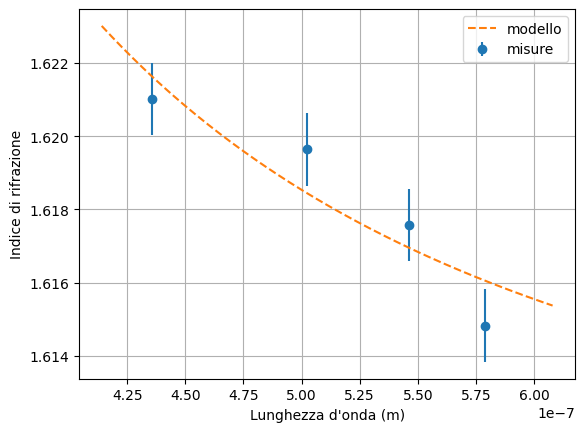

In [8]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Lunghezza d'onda (m)")
ax.set_ylabel("Indice di rifrazione")

plt.errorbar(lambda_hg, n_val, n_err, fmt='o',label='misure')
x = np.linspace(min(lambda_hg)*0.95,max(lambda_hg)*1.05,10000)
y = a + b / x**2
plt.plot(x,y,linestyle='--',label='modello')

plt.grid()
plt.legend()
plt.show()

### Idrogeno (non esce, ma non serve)

In [9]:
f_mul2 = 4 #fattore che moltiplica f_mul per far uscire il fit con l'idrogeno

In [10]:
theta_i_h = ufloat(np.radians(34 + 45/60), np.radians(1/60 * f_mul * f_mul2))
theta_f_h_senzaerr = np.radians(np.array([80 + 55/60, 84, 84 + 16/60])) #idrogeno (ignoto)
theta_f_h = []

for i in range(len(theta_f_h_senzaerr)):
    theta_f_h.append(ufloat(theta_f_h_senzaerr[i],np.radians(1/60 * f_mul * f_mul2)))

theta_f_h = np.array(theta_f_h)

delta_h = theta_f_h - theta_i_h

lambda_h = np.array([667.8, 492.1, 447.1]) * 10 ** (-9) #da confermare

n = []
n_val = []
n_err = []

for i in range(len(delta_h)):
    n.append( uu.sin((delta_h[i] + alpha)/2) / uu.sin(alpha/2) )
    n_val.append(n[i].nominal_value)
    n_err.append(n[i].std_dev)

minimi_quadrati = LeastSquares(lambda_h, n_val, n_err, model)

m = Minuit(minimi_quadrati, a=1, b=0)

m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.938 (χ²/ndof = 2.9)      │              Nfcn = 49               │
│ EDM = 3.29e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.573   │   0.008   │            │            │         │         │       │
│ 1 │ b    │ 13.1e-15  │  2.0e-15  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────┐
│   │                    a                    b │
├───┼───────────────────────────────────────────┤
│ a │             6.13e-05 -14.687340142404e-18 │
│ b │ -14.687340142404e-18             3.83e-30 │
└───┴───────────────────────────────────────────┘

p value: 0.08650010865658209


# Reticolo

$d \sin(\theta) = n \lambda$

dobbiamo trovare d

### Na

In [11]:
misure = {
    "Na 600 v1": {
        # 600
        "centro": np.radians(47 + 50/60),
        "aqua": np.radians([65 + 10/60, 30 + 20/60]),
        "verde":  np.radians([68 + 10/60, 28 + 17/60]),
        "giallo":  np.radians([68 + 24/60, 27 + 25/60]),
    },

    "Na 600 v2": {
        # 600
        "centro": np.radians(47 + 55/60),
        "verde" : np.radians([67 + 0/60, 28 + 0/60]),
        "giallo": np.radians([68 + 40/60, 27 + 30/60]),
    },

    "Na 1200": {
        # 1200
        "centro": np.radians(47 + 50/60),
        "g1": np.radians([92 + 20/60, 3 + 24/60]),
        "g2":  np.radians([92 + 25/60, 3 + 18/60]),
    }, 

    "H" : {
        # 600
        "centro": np.radians(48),
        "viola": np.radians([63 + 18/60, 33 + 0/60]),
        "aqua":  np.radians([65 + 11/60, 30 + 55/60]),
        "rosso": np.radians([71 + 25/60, 24 + 38/60]),
    },

    "Hg" : {
        # 1200
        "centro" : np.radians(48),
        "viola"  : np.radians([79 + 25/60, 16 + 47/60]),
        "verde": np.radians([7 + 45/60, 88 + 30/60]),
        "arancio1": np.radians([5, 91 + 20/60]),
        "arancio2": np.radians([4 + 55/60, 91 + 30/60]),
    }
}

angolo = []

# loop per tutti gli elementi del dizionario misure
for elemento in misure:
    centro = misure[elemento]["centro"]
    del misure[elemento]["centro"]

    for colore in misure[elemento]:
        angoli_delta = [abs(misure[elemento][colore][0] - centro), abs(misure[elemento][colore][1] - centro)]

        '''
        print("angoli delta " + elemento + " " + colore + ": " + str(angoli_delta))
        print((angoli_delta[1] + angoli_delta[0]) / np.radians(1/60))
        '''

        angolo.append((angoli_delta[0] + angoli_delta[1]) / 2)

In [12]:
angolo_Na600v1 = np.array(angolo[:3])

angolo_Na600v2 = np.array(angolo[3:5])

angolo_Na1200 = np.array(angolo[5:7])

angolo_H = np.array(angolo[7:10])

angolo_Hg = np.array(angolo[10:])

### Na 600 v1

In [13]:
d = 1/600 * 1/1000
lambda_Na600v1 = d * np.sin(angolo_Na600v1)
print(lambda_Na600v1)
# aqua, verde, giallo

[4.98863928e-07 5.68438762e-07 5.83451907e-07]


In [14]:
#prese dal NIST
lambda_Na600v1 = [ufloat(4980 * 10**(-10), 10**(-9)), ufloat(5690 * 10**(-10), 10**(-9)), ufloat(5890 * 10**(-10), 10**(-9))]

angolo_Na600v1_err = []
for i in range(len(angolo_Na600v1)):
    angolo_Na600v1_err.append( ufloat(angolo_Na600v1[i], np.radians(1/60)) )

d = []
for i in range(len(lambda_Na600v1)):
    temp = ( lambda_Na600v1[i] / uu.sin(angolo_Na600v1_err[i]) )
    d.append(1/(1000*temp))

print(d)

d_tot = 0
for i in range(len(d)):
    d_tot = d_tot + d[i]
d_tot = d_tot / len(d)
print(d_tot)
print("t student: " + str((600 - 598.3)/0.7)) #triste scritto così, ma non riesco altrimenti

[601.0408772292379+/-1.3293797804371643, 599.4081844819211+/-1.1578818311405854, 594.3482922040539+/-1.1100711643768573]
598.3+/-0.7
t student: 2.4285714285714937


### Na 600 v2

In [15]:
d = 1/600 * 1/1000
lambda_Na600v2 = d * np.sin((angolo_Na600v2))
print(lambda_Na600v2)
# verde, giallo

[5.56344765e-07 5.85948908e-07]


In [16]:
#prese dal NIST
lambda_Na600v2 = [ufloat(5690 * 10**(-10), 10**(-9)), ufloat(5890 * 10**(-10), 10**(-9))]

angolo_Na600v2_err = []
for i in range(len(angolo_Na600v2)):
    angolo_Na600v2_err.append( ufloat(angolo_Na600v2[i], np.radians(1/60)) )

d = []
for i in range(len(lambda_Na600v2)):
    temp = ( lambda_Na600v2[i] / uu.sin(angolo_Na600v2_err[i]) )
    d.append(1/(1000*temp))

print(d)

d_tot = 0
for i in range(len(d)):
    d_tot = d_tot + d[i]
d_tot = d_tot / len(d)
print(d_tot)
print("t student: " + str((600 - 591.8)/0.8)) #triste scritto così, ma non riesco altrimenti

[586.6552886358013+/-1.1380911021686217, 596.8919267254308+/-1.113883209168343]
591.8+/-0.8
t student: 10.250000000000057


Non esce, ma vabbè abbiamo quello prima equivalente con una misura in più fatto meglio

### Na 1200 

In [17]:
d = 1/1200 * 1/1000
lambda_Na1200 = d * np.sin((angolo_Na1200))
print(lambda_Na1200)
# g1, g2

[5.83745161e-07 5.84695890e-07]


In [18]:
#prese dal NIST
lambda_Na1200 = [ufloat(5885 * 10**(-10), 10**(-10)), ufloat(5889 * 10**(-10), 10**(-10))]

angolo_Na1200_err = []
for i in range(len(angolo_Na1200)):
    angolo_Na1200_err.append( ufloat(angolo_Na1200[i], np.radians(1/60)) )

d = []
for i in range(len(lambda_Na1200)):
    temp = ( lambda_Na1200[i] / uu.sin(angolo_Na1200_err[i]) )
    d.append(1/(1000*temp))

print(d)

d_tot = 0
for i in range(len(d)):
    d_tot = d_tot + d[i]
d_tot = d_tot / len(d)
print(d_tot)
print("t student: " + str((1200 - 1190)/0.29)) #triste scritto così, ma non riesco altrimenti

[1190.3044917860434+/-0.40662463312693886, 1191.4332949931993+/-0.40596339874760506]
1190.87+/-0.29
t student: 34.48275862068966


### H

In [19]:
d = 1/600 * 1/1000
lambda_H = d * np.sin((angolo_H))
print(lambda_H)
# viola, aqua, rosso

[4.35578239e-07 4.90993889e-07 6.61690674e-07]


In teoria per il gas ignoto sappiamo $d$ e dobbiamo trovare $\lambda$

Proprio le righe dell'idrogeno (ci potrebbe essere anche il viola in realtà)

### Hg

In [20]:
d = 1/1200 * 1/1000
lambda_Hg = d * np.sin((angolo_Hg))
print(lambda_Hg)
# viola, verde, arancio1, arancio2

[4.33139702e-07 5.39822963e-07 5.70102411e-07 5.71427080e-07]


In [21]:
##prese dal NIST
lambda_Hg = [ufloat(4360 * 10**(-10), 10**(-9)), ufloat(5430 * 10**(-10), 10**(-9)), ufloat(5680 * 10**(-10), 10**(-9)), ufloat(5770 * 10**(-10), 10**(-9))]

angolo_Hg_err = []
for i in range(len(angolo_Hg)):
    angolo_Hg_err.append( ufloat(angolo_Hg[i], np.radians(1/60)) )

d = []
for i in range(len(lambda_Hg)):
    temp = ( lambda_Hg[i] / uu.sin(angolo_Hg_err[i]) )
    d.append(1/(1000*temp))

print(d)

d_tot = 0
for i in range(len(d)):
    d_tot = d_tot + d[i]
d_tot = d_tot / len(d)
print(d_tot)
print("t student: " + str((1200 - 1194)/1.2)) #triste scritto così, ma non riesco altrimenti

[1192.127619024492+/-2.793013474885252, 1192.9789237680843+/-2.234598047244412, 1204.4417136426055+/-2.1531434511260077, 1188.4098707399612+/-2.0920686508466977]
1194.5+/-1.2
t student: 5.0
